In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""Conversion of features to continous distribtion"""

__author__ = "Anna Buch, Heidelberg University"
__email__ = "a.buch@stud.uni-heidelberg.de"

**Aim:** Convert discrete variables into continous scales for using continous BN

#### Variables to modify:

binary vars: --> remove or modify
- contaminaition 0 : modify

categ vars:
- flowvelocity : m/sec -> paper parotny for residential 
- sectors rm or merge by upper group
- flood exp: convert to mean of range - 
- shp_avgmonthly_sale_cat
- hh_monthly_income_cat
- merge resilinece
- merge perception
- merge emergyency measures : paprotny indicator
- merge precautionary ()impl
- overall_problem_house


ordered ranks is okay as long its in quantitative values



In [3]:
import sys
from pathlib import Path
from glob import glob
import re

import numpy as np
import pandas as pd
import geopandas as gpd


import pickle
import joblib

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sys.path.insert(0, "../../")
import utils.utils_feature_selection as fs
import utils.utils_evaluation as e
import utils.utils_figures as f
import utils.settings as s
import utils.utils_processing as pp

#s.init()
seed = s.seed

pd.set_option('display.max_columns', None)
plt.figure(figsize=(20, 10))

import warnings
warnings.filterwarnings('ignore')

targets = ["Target_relative_contentloss_euro", "Target_businessreduction"]
target = targets[0]


import matplotlib.pyplot as plt

c:\Anaconda\envs\py396_c3\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

In [6]:
df_final = pd.read_excel(f"../../input_survey_data/final_data_{target.split('_',1)[-1].rsplit('_',1)[0]}_tueb.xlsx")
df_final = df_final.drop("Target_relative_contentloss_euro.1", axis=1)
df_final.tail(3)


,Target_relative_contentloss_euro,shp_registered_capital_euro,flowvelocity,shp_employees,shp_avgmonthly_sale_cat,bage,water_barriers_impl,b_area,pumping_equipment_impl,water_depth_cm,hh_monthly_income_cat,inundation_duration_h,resistant_material_building_impl,flood_experience,emergency_measures.2,protect_valuables_impl,elevation_building_impl,shp_sector,emergency_measures.4,contaminations.0,emergency_measures.7,shp_owner,electricity_higher_impl
321,0.0,368.3,3,1,1,15.0,1,80.0,5,40,2.0,2.0,5,5,1,1,2,11,1,0,1,1,1
322,0.0,3682.6,2,2,2,1.0,1,80.0,5,40,3.0,5.0,5,6,1,1,4,11,1,0,1,3,5
323,0.0,3682.6,3,2,3,30.0,1,60.0,1,60,4.0,4.0,5,6,1,2,2,11,1,0,1,1,1


#### Plot distirbutions again

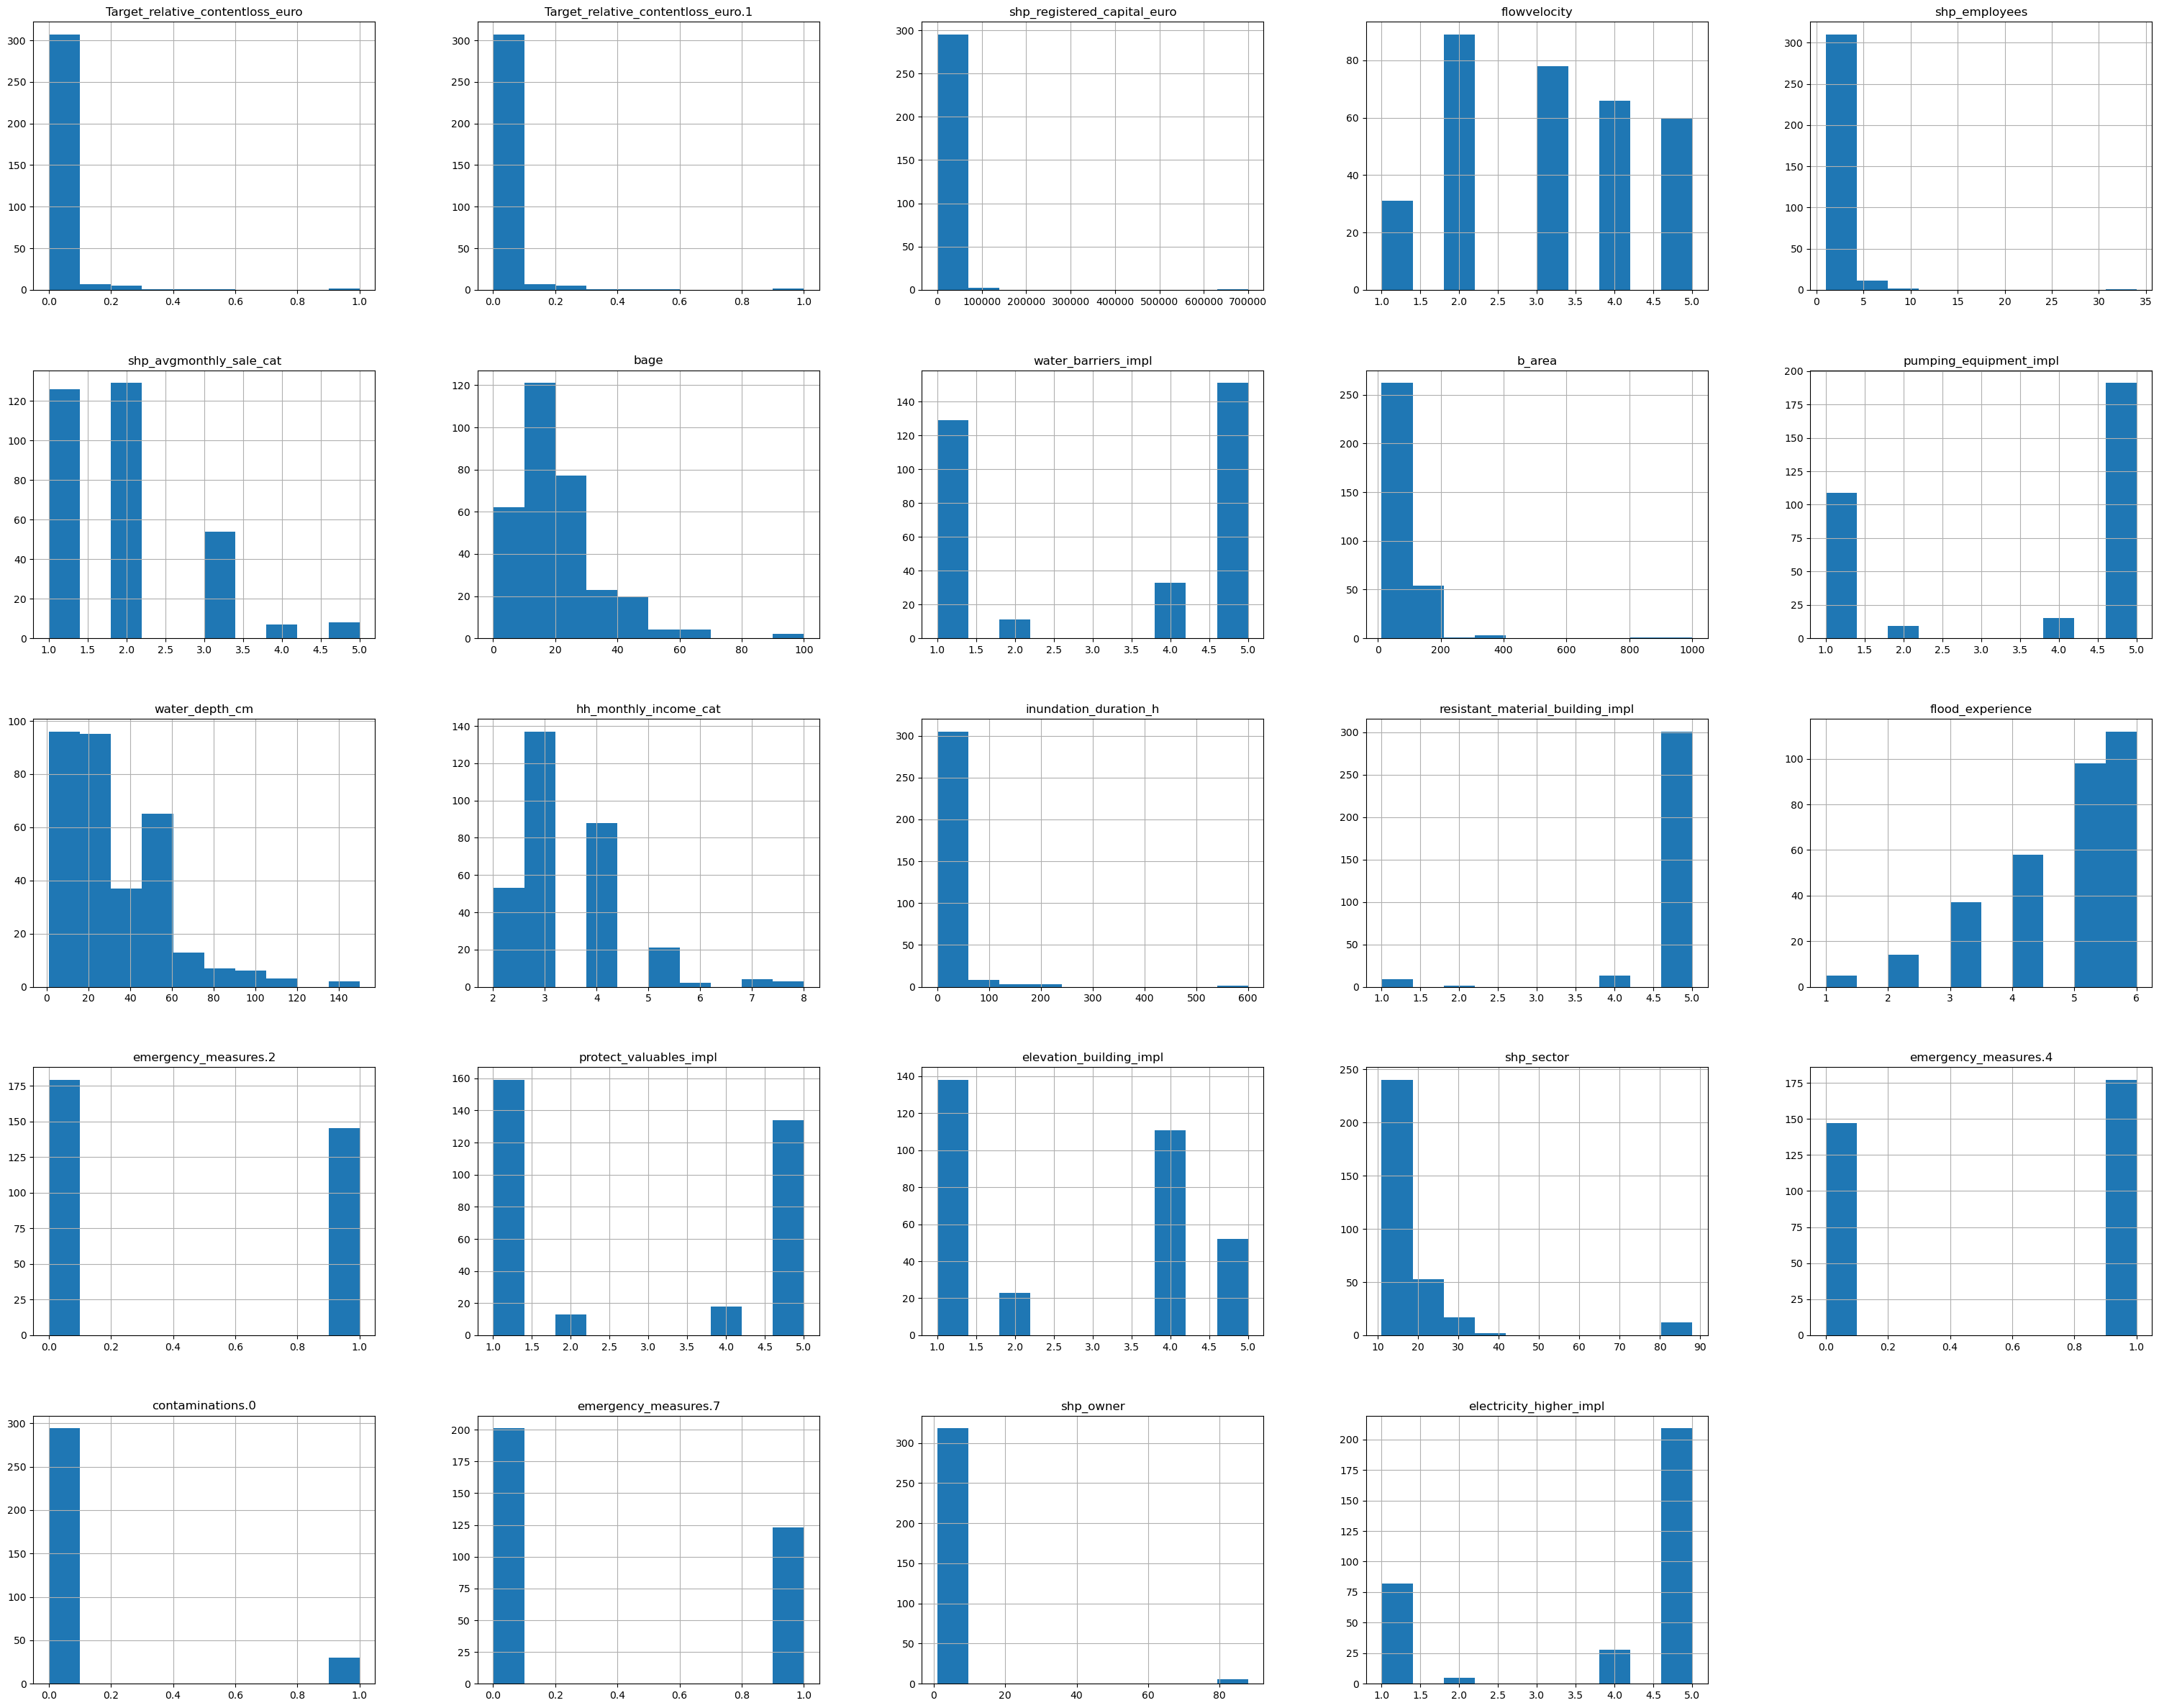

In [6]:
df_final.hist(bins=10, figsize=(38, 30));


## Variables to modify:

binary vars: --> remove or modify
- contaminaition 0 : modify

categ vars:
- DONE flowvelocity : m/sec -> paper paprotny 2021 for residential loss
- sectors rm or merge by upper group
- DONE flood exp: convert to mean of range - 
- shp_avgmonthly_sale_cat
- hh_monthly_income_cat
- merge resilience
- merge perception
- merge emergyency measures : paprotny indicator
- merge precautionary ()impl
- overall_problem_house


ordered ranks is okay as long its in quantitative values



In [14]:
damage_cases = df_final[df_final[target]>0.0]
damage_cases.describe()

,Target_relative_contentloss_euro,shp_registered_capital_euro,flowvelocity,shp_employees,shp_avgmonthly_sale_cat,bage,water_barriers_impl,b_area,pumping_equipment_impl,water_depth_cm,hh_monthly_income_cat,inundation_duration_h,resistant_material_building_impl,flood_experience,emergency_measures.2,protect_valuables_impl,elevation_building_impl,shp_sector,emergency_measures.4,contaminations.0,emergency_measures.7,shp_owner,electricity_higher_impl
count,133.000000,125.000000,133.000000,133.000000,133.000000,129.000000,133.000000,133.000000,133.000000,133.000000,125.000000,129.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.056082,8838.018400,3.428571,2.172932,1.932331,19.914729,3.248120,93.878195,3.578947,39.375940,3.480000,20.558140,4.789474,4.864662,0.488722,2.924812,2.909774,20.000000,0.639098,0.067669,0.390977,2.819549,3.842105
std,0.144453,63148.852766,1.238803,3.122526,0.836619,12.788564,1.843934,120.214911,1.843130,28.868196,1.059519,64.757047,0.728766,1.153269,0.501763,1.889461,1.616481,15.841545,0.482078,0.252127,0.489814,7.503368,1.664432
min,0.000254,55.200000,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,1.000000,2.000000,2.000000,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.003557,368.300000,2.000000,1.000000,1.000000,12.000000,1.000000,45.000000,1.000000,20.000000,3.000000,2.000000,5.000000,4.000000,0.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.010001,1473.000000,4.000000,2.000000,2.000000,18.000000,4.000000,65.000000,5.000000,39.000000,3.000000,3.000000,5.000000,5.000000,0.000000,2.000000,4.000000,17.000000,1.000000,0.000000,0.000000,3.000000,5.000000
75%,0.029121,2577.800000,5.000000,2.000000,2.000000,24.000000,5.000000,100.000000,5.000000,50.000000,4.000000,9.000000,5.000000,6.000000,1.000000,5.000000,4.000000,21.000000,1.000000,0.000000,1.000000,3.000000,5.000000
max,1.000000,699687.000000,5.000000,34.000000,5.000000,62.000000,5.000000,1000.000000,5.000000,150.000000,8.000000,600.000000,5.000000,6.000000,1.000000,5.000000,5.000000,88.000000,1.000000,1.000000,1.000000,88.000000,5.000000


count    324.000000
mean       3.108025
std        1.262975
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: flowvelocity, dtype: float64

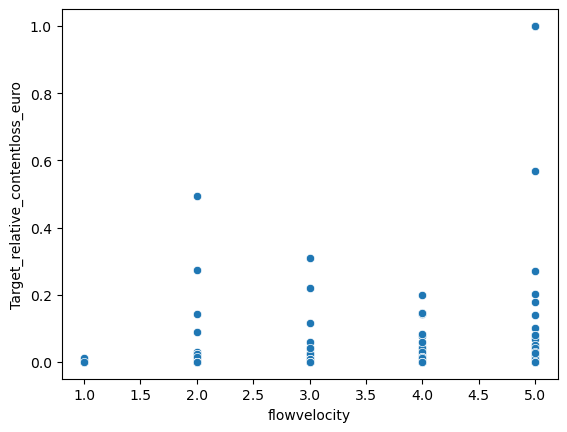

In [21]:
## flow velocity: categories 1:calm - 5:torrential
## Paprotny 2021:  As for flow velocity, the respondents assessed it based on a qualitative scale, providing a value from 1 to 6, with half-points possible (Thieken et al. 2005). A value of 0.1 m/s was assigned to each full step of this qualitative scale. 

sns.scatterplot(
    data=df_final, 
    x="flowvelocity", 
    #x="water_depth_cm", 
    y=target, 
    #hue="size", #style="time"
)

df_final.flowvelocity.describe()

df_final.flowvelocity = df_final.flowvelocity.replace(
    {
        1:0.1, 
        2:0.2, 
        3:0.3, 
        4:0.4, 
        5:0.5
    }
)


In [23]:
## flood experience: mean of ranges
# 1:  1-5 (less than once a year)	                  
# 2:  6-10 (about once a year)	                                  
# 3:  11-20 (1-2 times a year)	             
# 4:  21-50 (2-5 times a year)                               
# 5:  51-100 (5-10 time a year)                                         6:  over 100  (more than 10 time a year)
# 6: over 100 (more than 10 times a year)

df_final.flood_experience.describe()

df_final.flood_experience = df_final.flood_experience.replace(
    {
      1:3,     # less than once a year , freq: 1
      2:8,     # about once a year, freq: 14
      3:16,      # twice a year, freq: 37
      4:36,      # 4 times a year, freq: 58
      5:76,      # 8 times a year, freq: 98
      6:151     # 15 times a year - used range 100-200, freq: 112 (more than 10 times a year, 100 times since 2010)
    }
)


count    324.000000
mean       4.746914
std        1.248215
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        6.000000
Name: flood_experience, dtype: float64

In [28]:
## avg monthly sale
# (million VND/month)
# 1.	less than 5m 
# 2.	5m – 10m
# 3.	10m – 30m  
# 4.	30m – 50m 
# 5.	50m – 100m
# 6.	100m – 200m
# 7.	>200m

df_final.shp_avgmonthly_sale_cat.value_counts()

df_final.shp_avgmonthly_sale_cat = df_final.shp_avgmonthly_sale_cat.replace(
    {
      1:2.5,     # < 5m , freq: 126
      2:7.5,     # 5m – 10m , freq: 129
      3:20,      # 10m – 30m , freq: 54
      4:40,      # 30m – 50m , freq: 7
      5:75,      # 50m – 100m , freq: 8
    }
)

shp_avgmonthly_sale_cat
2    129
1    126
3     54
5      8
4      7
Name: count, dtype: int64

In [30]:
## avg monthly income
# 1: less than 1m 
# 2: 1m – 5m 
# 3: 5m – 10m
# 4: 10m – 20m  
# 5: 20m – 30m 
# 6: 30m – 50m 
# 7: 50m – 80m
# 8: 80m – 100m
# 9: >100m


df_final.hh_monthly_income_cat.value_counts()

df_final.hh_monthly_income_cat = df_final.hh_monthly_income_cat.replace(
    {
      2:3,     # 1m – 5m , freq: 53
      3:8,     # 5m – 10m , freq: 137
      4:15,    # 10m – 20m , freq: 88
      5:25,    # 20m – 30m , freq: 21
      6:40,    # 30m – 50m , freq: 2
      7:65,    # 50m – 80m , freq: 4
      8:90,    # 80m – 100m , freq: 3
    }
)


hh_monthly_income_cat
3.0    137
4.0     88
2.0     53
5.0     21
7.0      4
8.0      3
6.0      2
Name: count, dtype: int64

# Reste

### select continous variables

In [151]:
df_candidates.columns

Index(['Target_direct', 'business_reduction', 'inundation_duration_h',
       'water_depth_cm', 'warning_time_h', 'shp_damage_level_furniture',
       'shp_damage_level_electronics', 'shp_damage_level_equipment',
       'shp_damage_level_products', 'shp_damage_level_others', 'shp_closed_d',
       'shp_duration_back2normal', 'contaminations', 'emergency_measures',
       'protect_valuables_impl', 'water_barries_impl',
       'pumping_equipment_impl', 'elevation_building_impl',
       'resistant_material_building_impl', 'electricity_higher_impl',
       'flood_protections_impl', 'elevation_building_height_cm',
       'insurance_business', 'building_elevation_rel2surrounding_cat',
       'shp_sector', 'shp_employees', 'shp_avgmonthly_sale_mVND',
       'shp_capital_mVND', 'shp_risk_behaviour',
       'shp_monetary_resources_prenvention', 'building_floor', 'elevation_m'],
      dtype='object')

In [152]:
# Columns that require discretization 

continous_vars_list = [
    r"^Target*", "business_reduction", "water_depth", 
    "inundation_duration_h", "warning_time_h", "shp_closed_d",
    "shp_duration_back2normal", "elevation_building_height_cm", 
    "building_floorsize_sqm", 
    "building_renovation_cost_mVND*", "shp_employees", r"shp_capital_mVND$", "elevation_m"
]

pattern_cols = re.compile('|'.join(continous_vars_list))

# further continous vars not in candidates: 
# flow_velocity, repair_costs_building_VND_r, repair_costs_building_complete_r, building_renovation_cost_mVND_r
# *_spnd where  not 2 or 99 , "cost for elevations" not 1 or 99,

df_continous = df_candidates.filter(regex=pattern_cols) 
#df_continous.head(2)
df_continous.describe()

#df_discrete = df_candidates.iloc[:, ~df_candidates.filter(regex=pattern_cols) ]

,Target_direct,business_reduction,inundation_duration_h,water_depth_cm,warning_time_h,shp_closed_d,shp_duration_back2normal,elevation_building_height_cm,shp_employees,shp_capital_mVND,elevation_m
count,504.000000,503.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,500.000000
mean,33.884524,25.803181,14.146230,34.950397,1.582341,4.216270,5.769841,62.194444,2.003968,158.100794,3.620000
std,381.069413,32.887939,48.022307,26.028573,6.943801,23.781202,24.941096,44.112790,2.405259,1221.034503,1.816094
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,0.000000,0.000000,2.000000,15.000000,0.000000,0.000000,0.000000,38.750000,1.000000,7.000000,3.000000
50%,0.000000,10.000000,3.000000,30.000000,0.000000,0.000000,0.000000,60.000000,2.000000,20.000000,3.000000
75%,3.000000,40.000000,6.000000,50.000000,0.000000,2.000000,3.000000,84.750000,2.000000,50.000000,5.000000
max,6000.000000,100.000000,600.000000,150.000000,60.000000,365.000000,365.000000,270.000000,34.000000,19000.000000,13.000000


In [153]:
## TODO check for 99 and in specific cols also for 2
df_candidates_clean[(df_candidates_clean == 2).any(axis=1)]

## replace 99 by 0.0
df_candidates_clean = df_candidates_clean.replace(99, 0.0)

In [162]:
#' The dataframe that maps the number of classes to each 
#' variables that needs discretization 
discretization_df = pd.DataFrame(columns = df_continous.columns)#, classes = rep(n_classes, len(continous_vars_list))) 
discretization_df

# Discretize model data 
# # Filter out cases with missing data 
#print(df_candidates.isna().sum())
print(df_candidates.shape)
## remove observations with missing information
df_candidates_clean = df_candidates.dropna()
print(df_candidates_clean.shape)

# #' Discretize relative loss manually to receive the desired bin widths:
#  #' i.e. zero and one cases are one category 
# #' and the rest is disretized based on equal frequency 

## TODO set 0.0 to one class, and outlier also to one class with min. two observations, than apply equal frequency 
#cutpoints_dloss = [0.0, 0.01, 0.25, 0.50, 0.75, 1.0]#[0, 1.00e-9, 0.053, 0.168, 0.967, 1]  # eg. [0, .25, .5, .75, 1.] list or number for quartile
#target_direct_disc = pd.qcut(df_candidates_clean.Target_direct, q=10, precision=2,#cutpoints_dloss, labels=False,
#                              duplicates="drop", retbins=False)
discretization_df["Target_direct"] = pd.cut(df_candidates_clean.Target_direct, [-00.1, 0.01, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 6000.0],
               labels=[0, 1, 2, 3, 4, 5, 6, 7])
    


print(discretization_df.tail(2))
#print(df_candidates_clean.Target_direct.value_counts())


(504, 32)
(499, 32)


In [220]:
discretization_df["Target_direct"].value_counts()

Target_direct
0    285
2     72
1     55
3     33
4     19
5     18
6      9
7      8
Name: count, dtype: int64

In [167]:
# Discretize remaining continuous variables and combine in one data frame 
print("quantile cutting:")
for c in df_continous.columns.drop("Target_direct"):
   discretization_df[c] = pd.qcut(df_continous[c], q=[.000, .001, .25, .5, .75, 1.], precision=1, labels=False,  duplicates="drop") #cutpoints_dloss, labels=False,

discretization_df.describe()


## Check whether desired discretization was achieved 
# sapply(data_disc, function(x)length(levels(x)))

,business_reduction,inundation_duration_h,water_depth_cm,warning_time_h,shp_closed_d,shp_duration_back2normal,elevation_building_height_cm,shp_employees,shp_capital_mVND,elevation_m
count,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.687375,1.332665,1.330661,0.0,0.234469,0.246493,1.426854,0.164329,1.454910,0.631263
std,0.839811,1.186248,1.057048,0.0,0.424092,0.431401,1.121244,0.370945,1.106512,0.711569
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,3.000000,0.000000,2.000000,1.000000
max,2.000000,3.000000,3.000000,0.0,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [216]:
discretization_df.business_reduction.value_counts()

business_reduction
0.0    278
2.0    122
1.0     99
Name: count, dtype: int64

In [218]:
## combine dsicretized df with other categorical vairables

for c in discretization_df.columns:
    df_candidates[c] = discretization_df[c]  

print(df_candidates.shape)
df_candidates.tail(3)

(504, 32)


,Target_direct,business_reduction,inundation_duration_h,water_depth_cm,warning_time_h,shp_damage_level_furniture,shp_damage_level_electronics,shp_damage_level_equipment,shp_damage_level_products,shp_damage_level_others,...,insurance_business,building_elevation_rel2surrounding_cat,shp_sector,shp_employees,shp_avgmonthly_sale_mVND,shp_capital_mVND,shp_risk_behaviour,shp_monetary_resources_prenvention,building_floor,elevation_m
501,2,0.0,3.0,1.0,0.0,1,1,3,1,0,...,2,0,15,1.0,4,3.0,2,4,0,0.0
502,2,2.0,0.0,0.0,0.0,2,2,4,2,0,...,2,0,17,0.0,1,1.0,2,1,1,1.0
503,0,2.0,2.0,1.0,0.0,2,1,1,1,0,...,2,0,17,0.0,2,2.0,3,3,0,0.0


In [219]:
df_candidates.to_excel("../input_survey_data/survey_data_candidates_coords_disc.xlsx", index=False)
